In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mlxtend.data import loadlocal_mnist
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x, y = loadlocal_mnist(images_path='F:/Uni/991/Pattern/SPR_HW4/inputs/P7/t10k-images-idx3-ubyte',
                                 labels_path='F:/Uni/991/Pattern/SPR_HW4/inputs/P7/t10k-labels-idx1-ubyte')

## a

In [3]:
#computing principal components
print('Part a')
pca = PCA()
xnew = pca.fit_transform(x)
eigvec = pca.components_
eigval = pca.explained_variance_

In [4]:
print('Top 20 Eigenvalues:\n', eigval[:20])

Top 20 Eigenvalues:
 [1288319.52477778  779197.62253773  265730.43854769  218669.76933454
  169257.23458071  152452.76424582  104674.41864859   83982.28146176
   58343.40694262   57195.68413797   43687.97445268   40723.99121484
   33555.72854707   28600.97342107   27417.8420902    25851.22397945
   24625.32484158   23565.45043936   21254.55872949   19657.63948351]


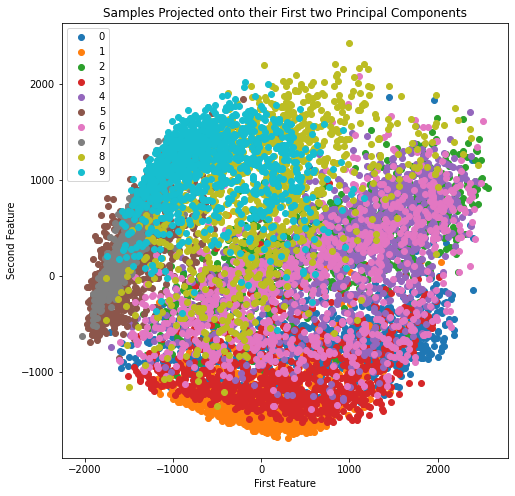

In [5]:
fig = plt.figure(figsize = (8,8))
for val in np.unique(y):
    plt.scatter(xnew[y==val][:,0], xnew[y==val][:,1], label=val)
    plt.legend()
    plt.title('Samples Projected onto their First two Principal Components')
    plt.xlabel('First Feature')
    plt.ylabel('Second Feature')
plt.show()

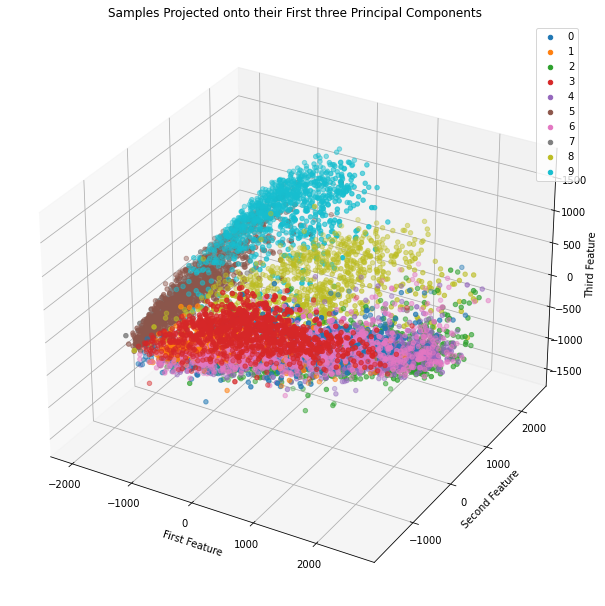

In [6]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
for val in np.unique(y):
    ax.scatter(xnew[y==val][:,0], xnew[y==val][:,1], xnew[y==val][:,2], label=val)
    ax.legend()
    plt.title('Samples Projected onto their First three Principal Components')
    ax.set_xlabel('First Feature')
    ax.set_ylabel('Second Feature')
    ax.set_zlabel('Third Feature')
plt.show()

## b

In [7]:
print('Part b')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [8]:
#computing linear discriminants
lda = LDA()
x_lda = lda.fit_transform(x, y)

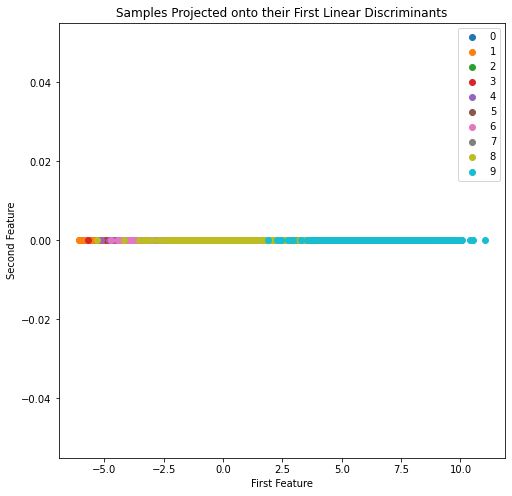

In [9]:
fig = plt.figure(figsize = (8,8))
for val in np.unique(y):
    points = x_lda[y==val][:,0]
    p = np.zeros(points.shape)
    plt.scatter(points,p, label=val)
    plt.legend()
    plt.title('Samples Projected onto their First Linear Discriminants')
    plt.xlabel('First Feature')
    plt.ylabel('Second Feature')
plt.show()

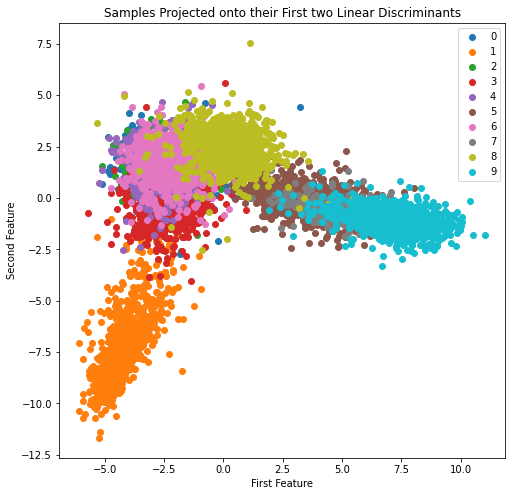

In [10]:
fig = plt.figure(figsize = (8,8))
for val in np.unique(y):
    plt.scatter(x_lda[y==val][:,0], x_lda[y==val][:,1], label=val)
    plt.legend()
    plt.title('Samples Projected onto their First two Linear Discriminants')
    plt.xlabel('First Feature')
    plt.ylabel('Second Feature')
plt.show()

## c

In [44]:
#4-means with random initialization
print('Part c')
kmeans4 = KMeans(n_clusters=4, init='random', random_state=0).fit(xnew[:,:2])
centroids4 = kmeans4.cluster_centers_
print('Final Centroids for random 4-means:\n', centroids4)

Final Centroids for random 4-means:
 [[  134.89089158 -1002.45416367]
 [ -250.02453903  1046.49700216]
 [ 1458.05372717   301.87191197]
 [-1395.45395185    83.85928286]]


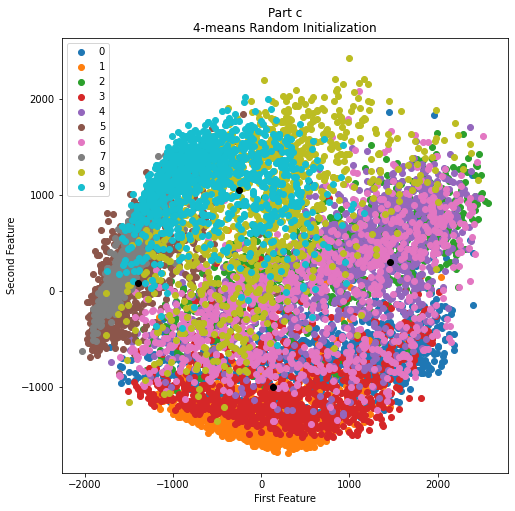

In [12]:
fig = plt.figure(figsize = (8,8))
for val in np.unique(y):
    plt.scatter(xnew[y==val][:,0], xnew[y==val][:,1], label=val)
    plt.legend()
    plt.title('Part c\n4-means Random Initialization')
    plt.xlabel('First Feature')
    plt.ylabel('Second Feature')
plt.scatter(centroids4[:,0], centroids4[:,1], c='black')
plt.show()

In [45]:
#7-means with random initialization
kmeans7 = KMeans(n_clusters=7, init='random', random_state=0).fit(xnew[:,:2])
centroids7 = kmeans7.cluster_centers_
print('Final Centroids for random 7-means:\n', centroids7)

Final Centroids for random 7-means:
 [[ 1621.51993733   742.15909046]
 [ -678.57723797  -682.41016529]
 [ 1301.05671997  -656.94940971]
 [-1520.25380962   187.83302841]
 [  372.98100037   293.58203121]
 [  177.0006429  -1249.01886763]
 [ -499.07295698  1226.06927694]]


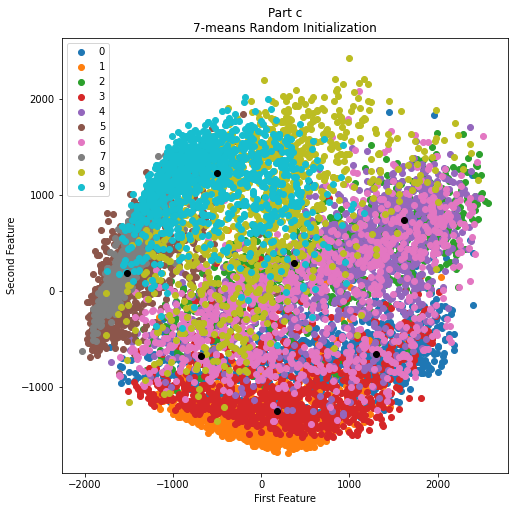

In [14]:
fig = plt.figure(figsize = (8,8))
for val in np.unique(y):
    plt.scatter(xnew[y==val][:,0], xnew[y==val][:,1], label=val)
    plt.legend()
    plt.title('Part c\n7-means Random Initialization')
    plt.xlabel('First Feature')
    plt.ylabel('Second Feature')
plt.scatter(centroids7[:,0], centroids7[:,1], c='black')
plt.show()

In [46]:
#10-means with random initialization
kmeans10 = KMeans(n_clusters=10, init='random', random_state=0).fit(xnew[:,:2])
centroids10 = kmeans10.cluster_centers_
print('Final Centroids for random 10-means:\n', centroids10)

Final Centroids for random 10-means:
 [[  938.34449154   343.27477143]
 [ 1808.71167986   752.74138922]
 [  335.01177095  1346.02951357]
 [ -679.13876521  -921.161046  ]
 [  232.1597652  -1270.6529627 ]
 [ 1317.06885859  -686.88202874]
 [-1643.22375736  -101.48286465]
 [  -94.96962262   -18.40305736]
 [ -718.7097315   1201.73696491]
 [-1319.33032579   536.75983914]]


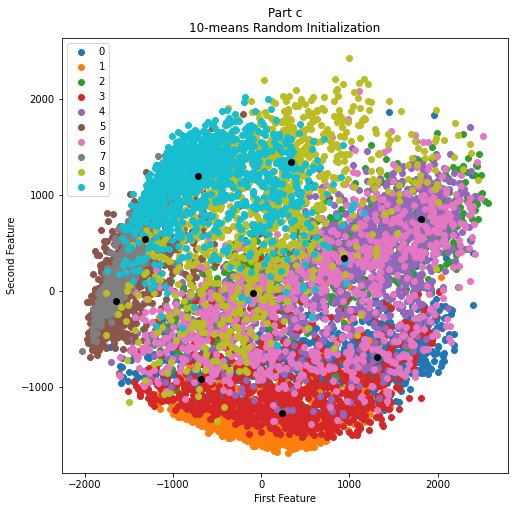

In [16]:
fig = plt.figure(figsize = (8,8))
for val in np.unique(y):
    plt.scatter(xnew[y==val][:,0], xnew[y==val][:,1], label=val)
    plt.legend()
    plt.title('Part c\n10-means Random Initialization')
    plt.xlabel('First Feature')
    plt.ylabel('Second Feature')
plt.scatter(centroids10[:,0], centroids10[:,1], c='black')
plt.show()

## d

In [17]:
#centroids initialization for 4-means
print('Part d')
mean41=np.expand_dims(np.concatenate((xnew[y==0,:2], xnew[y==2,:2], xnew[y==4,:2], xnew[y==6,:2]), 0).mean(0),0)
mean42=np.expand_dims(np.concatenate((xnew[y==1,:2], xnew[y==3,:2]), 0).mean(0),0)
mean43=np.expand_dims(np.concatenate((xnew[y==5,:2], xnew[y==7,:2], xnew[y==9,:2]), 0).mean(0),0)
mean44=np.expand_dims(xnew[y==8,:2].mean(0),0)

init_centroids4 = np.concatenate((mean41, mean42, mean43, mean44),0)

In [18]:
print('Initial Centroids for 4-means:\n', init_centroids4)

Initial Centroids for 4-means:
 [[  801.49215612   -16.48456837]
 [  157.38855841 -1186.8653773 ]
 [-1187.65526315   528.71048437]
 [   42.22004815   853.53757495]]


In [19]:
#4-means with initialization
kmeans4 = KMeans(n_clusters=4, init=init_centroids4, random_state=0).fit(xnew[:,:2])
centroids4 = kmeans4.cluster_centers_
print('Final Centroids for 4-means:\n',centroids4)

Final Centroids for 4-means:
 [[ 1458.85697254   300.44107859]
 [  133.46288895 -1003.05685467]
 [-1395.04249642    84.96844085]
 [ -247.62319327  1045.61305538]]


C:\Users\HR\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


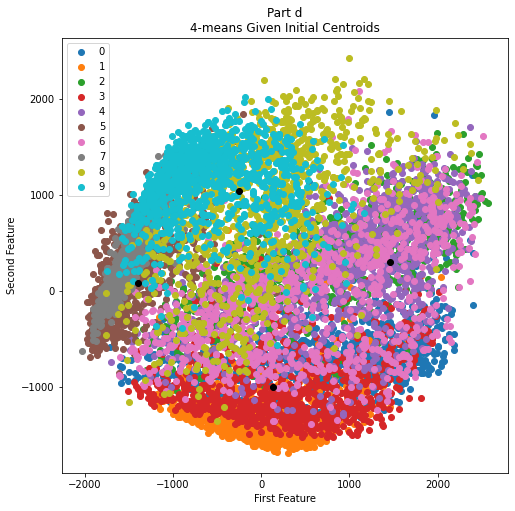

In [20]:
fig = plt.figure(figsize = (8,8))
for val in np.unique(y):
    plt.scatter(xnew[y==val][:,0], xnew[y==val][:,1], label=val)
    plt.legend()
    plt.title('Part d\n4-means Given Initial Centroids')
    plt.xlabel('First Feature')
    plt.ylabel('Second Feature')
plt.scatter(centroids4[:,0], centroids4[:,1], c='black')
plt.show()

In [21]:
#centroids initialization for 7-means
mean71=np.expand_dims(np.concatenate((xnew[y==0,:2], xnew[y==2,:2], xnew[y==4,:2]), 0).mean(0),0)
mean72=np.expand_dims(xnew[y==1,:2].mean(0),0)
mean73=np.expand_dims(xnew[y==3,:2].mean(0),0)
mean74=np.expand_dims(xnew[y==5,:2].mean(0),0)
mean75=np.expand_dims(xnew[y==6,:2].mean(0),0)
mean76=np.expand_dims(xnew[y==8,:2].mean(0),0)
mean77=np.expand_dims(np.concatenate((xnew[y==7,:2], xnew[y==9,:2]), 0).mean(0),0)

init_centroids7 = np.concatenate((mean71, mean72, mean73, mean74, mean75, mean76, mean77),0)

In [22]:
print('Initial Centroids for 7-means:\n', init_centroids7)

Initial Centroids for 7-means:
 [[  872.64428803    -5.07693251]
 [   21.99915562 -1351.07068695]
 [  292.7779612  -1022.66006765]
 [-1499.39952553    92.99348207]
 [  588.0357604    -50.70747594]
 [   42.22004815   853.53757495]
 [-1031.78313195   746.56898552]]


In [23]:
#7-means with initialization
kmeans7 = KMeans(n_clusters=7, init=init_centroids7, random_state=0).fit(xnew[:,:2])
centroids7 = kmeans7.cluster_centers_
print('Final Centroids for 7-means:\n', centroids7)

Final Centroids for 7-means:
 [[ 1590.3713748    636.48164431]
 [ -136.48494165 -1198.06429935]
 [ 1181.55604888  -741.67682985]
 [-1512.98409314   -26.15749697]
 [   61.57222292    20.27759411]
 [  214.09866664  1311.11353128]
 [ -977.47104932   976.24313391]]


C:\Users\HR\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


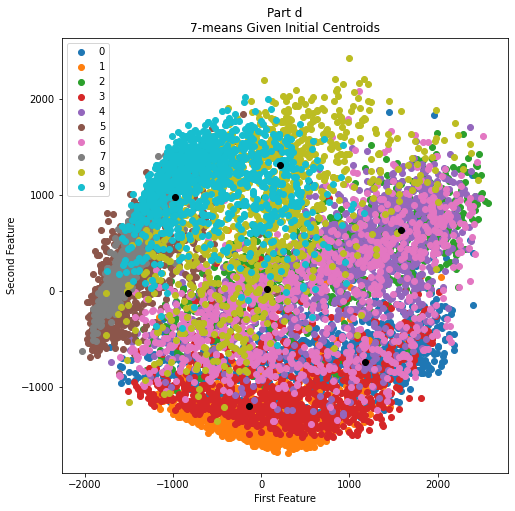

In [24]:
fig = plt.figure(figsize = (8,8))
for val in np.unique(y):
    plt.scatter(xnew[y==val][:,0], xnew[y==val][:,1], label=val)
    plt.legend()
    plt.title('Part d\n7-means Given Initial Centroids')
    plt.xlabel('First Feature')
    plt.ylabel('Second Feature')
plt.scatter(centroids7[:,0], centroids7[:,1], c='black')
plt.show()

In [25]:
#centroids initialization for 10-means
init_centroids10 = np.zeros((10,2))
for i in range(10):
    mean10=np.expand_dims(xnew[y==i,:2].mean(0),0)
    init_centroids10[i,:] = mean10

In [26]:
print('Initial Centroids for 10-means:\n', init_centroids10)

Initial Centroids for 10-means:
 [[  710.05168291  -603.05272142]
 [   21.99915562 -1351.07068695]
 [  830.20959182   316.12315115]
 [  292.7779612  -1022.66006765]
 [ 1077.67158935   271.69877274]
 [-1499.39952553    92.99348207]
 [  588.0357604    -50.70747594]
 [-1481.01691638   395.74123708]
 [   42.22004815   853.53757495]
 [ -582.54934753  1097.39673396]]


In [27]:
#10-means with initialization
kmeans10 = KMeans(n_clusters=10, init=init_centroids10, random_state=0).fit(xnew[:,:2])
centroids10 = kmeans10.cluster_centers_
print('Final Centroids for 10-means:\n', centroids10)

Final Centroids for 10-means:
 [[ 1342.50479943  -667.437965  ]
 [ -629.30319819  -987.43054719]
 [  922.44496213   342.97558409]
 [  288.64363534 -1253.69550458]
 [ 1807.02429505   758.31989015]
 [-1641.6457468   -129.96649807]
 [ -139.87026762   -26.68341956]
 [-1349.14072533   505.28789419]
 [  309.2771595   1349.82987375]
 [ -745.97326124  1181.93559655]]


C:\Users\HR\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


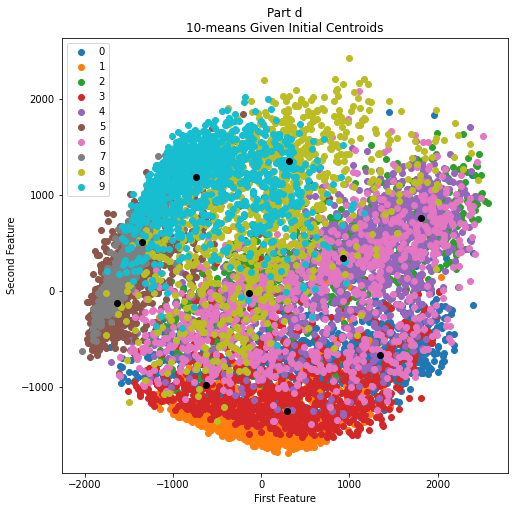

In [28]:
fig = plt.figure(figsize = (8,8))
for val in np.unique(y):
    plt.scatter(xnew[y==val][:,0], xnew[y==val][:,1], label=val)
    plt.legend()
    plt.title('Part d\n10-means Given Initial Centroids')
    plt.xlabel('First Feature')
    plt.ylabel('Second Feature')
plt.scatter(centroids10[:,0], centroids10[:,1], c='black')
plt.show()

## e

In [4]:
print('Part e')
#finding K to achieve 95 percent of the variations in PCA
s=0
k=0
while s<=0.95:
    s+=pca.explained_variance_ratio_[k]
    k+=1
print('for k= ',k ,'we have: ', s)


for k=  183 we have:  0.9501609243274309


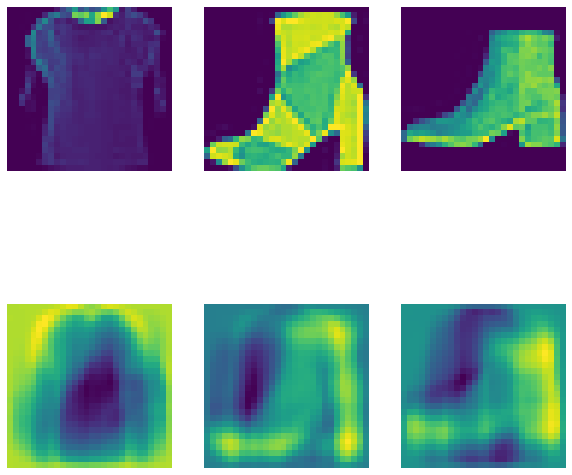

In [40]:
rand = np.random.randint(x.shape[0], size=3)
fig, axs = plt.subplots(2,3,figsize=(10, 10))
r=0
for j in range(3):
    axs[0,j].set_axis_off()
    axs[0,j].imshow(x[rand[r]].reshape(28, 28))
    axs[1,j].set_axis_off()
    reconstruct = np.dot(xnew[rand[r],:k],eigvec[:k,:])
    axs[1,j].imshow(reconstruct.reshape(28, 28))
    r+=1
plt.show()

## f

In [6]:
#kmeans with pca from part e
print('Part f')
kmeans = KMeans(n_clusters=10, random_state=0)
labels = kmeans.fit_predict(xnew[:,:k])


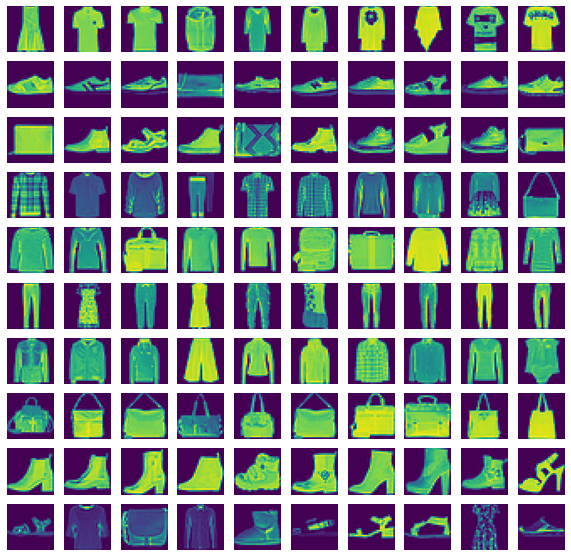

In [13]:
fig, axs = plt.subplots(10,10,figsize=(10, 10))
for i in range(10):
    r=0
    current_cluster = x[labels==i]
    rand = np.random.randint(current_cluster.shape[0], size=10)
    for j in range(10):
        axs[i,j].set_axis_off()
        axs[i,j].imshow(current_cluster[rand[r]].reshape(28, 28))
        r+=1
plt.show()

## g

In [14]:
#adding the class labels to make working in this part easier
print('Part g')
df = pd.concat([pd.DataFrame(x), pd.DataFrame(y, columns=['y'])],1)
#df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,...,3,0,3,174,189,67,0,0,0,2
2,0,0,0,0,0,0,0,0,1,0,...,58,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,21,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,2,0,1,1,0,0,0,...,12,0,0,0,0,0,0,0,0,6


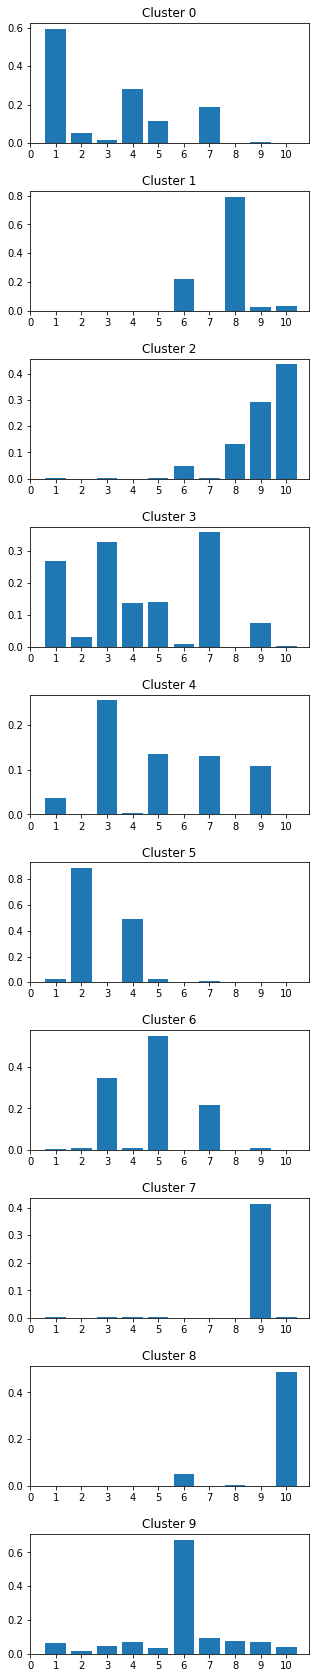

In [26]:
#plotting the bars for each cluster showing the amount of each class in the clusters
centroids = kmeans.cluster_centers_
fig, axs = plt.subplots(10,1,figsize=(5, 30))
for i in range(10):
    current_cluster = df.iloc[labels==i].reset_index(drop=True)
    percentage = list()
    for k in range(10):
        per = list(current_cluster.y).count(k)/list(y).count(k)
        percentage.append(per)
    axs[i].bar(np.arange(1,11,1),percentage)
    axs[i].set_xticks(np.arange(0,11,1))
    axs[i].set_title('Cluster %d'%i)
plt.subplots_adjust(hspace=0.4)
plt.show()

## h

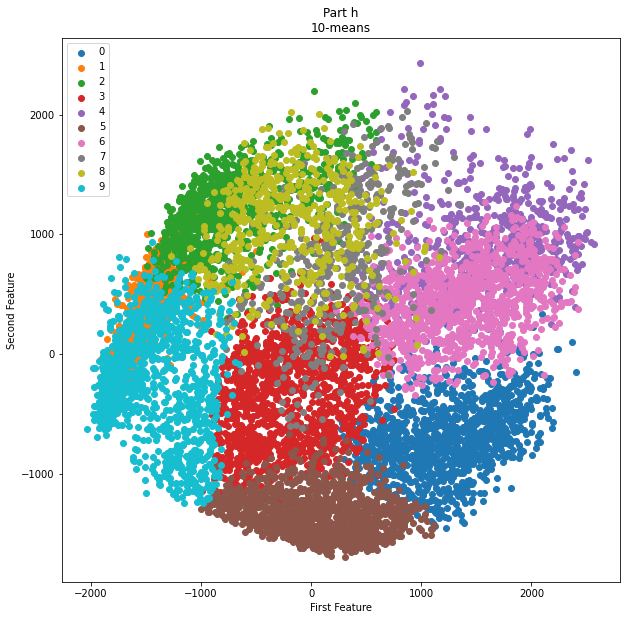

In [41]:
#plotting the clusters
print('Part h')
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    current_cluster = xnew[labels==i,:k]
    plt.scatter(current_cluster[:,0], current_cluster[:,1], label=i)
    plt.legend()
    plt.title('Part h\n10-means')
    plt.xlabel('First Feature')
    plt.ylabel('Second Feature')
plt.show()

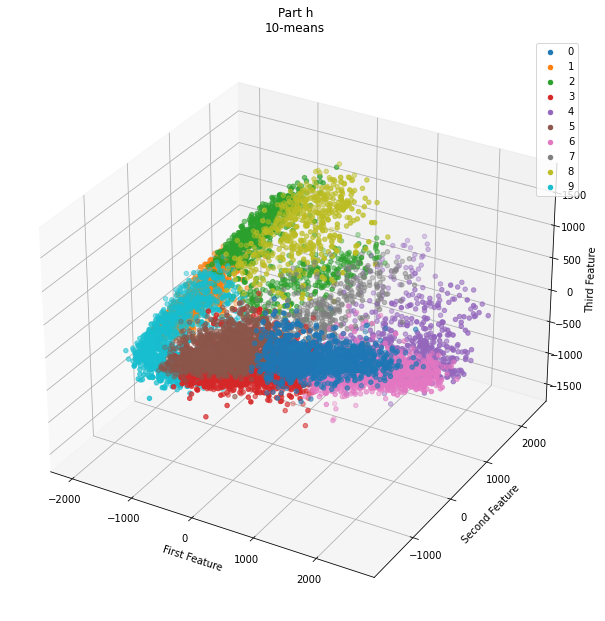

In [43]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
for i in range(10):
    current_cluster = xnew[labels==i,:k]
    ax.scatter(current_cluster[:,0], current_cluster[:,1], current_cluster[:,2], label=i)
    ax.legend()
    ax.set_title('Part h\n10-means')
    ax.set_xlabel('First Feature')
    ax.set_ylabel('Second Feature')
    ax.set_zlabel('Third Feature')
plt.show()